
___

<a href='http://www.masterbigdatauned.com'><p style="text-align:center;"> 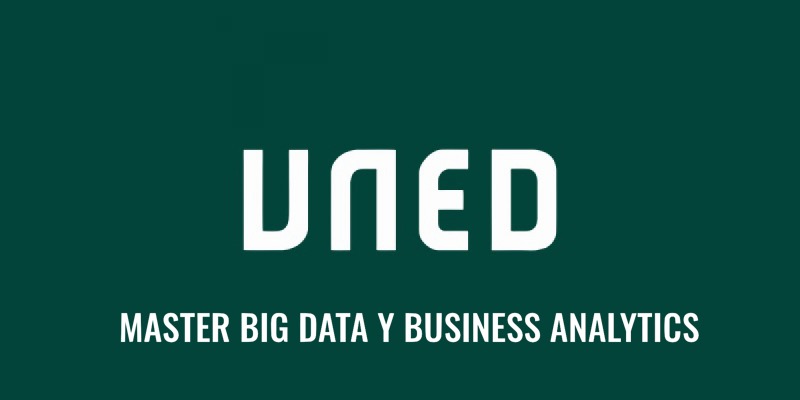</a>
___

<h2 align="center">Trabajo Fin de Master 2021</h2> 

<h1 align="center">Análisis Predictivo del Mercado de Valores</h1> 

<h2 align="center">Mario Herrero González</h2> 

<h3 align="center">Resumen</h3> 

### Índice

- [Introducción](#intro)
- [Obtención de datos](#datos)
- [Análisis Exploradorio de Datos](#aed)
- [Método](#met)
- [Resultados](#res)
- [Conclusiones](#concl)
- [Discusión](#disc)

<a name='intro'></a>
## Introducción

Este Trabajo de Fin de Master está enfocado a la orientación de Data Scientist. El objetivo es analizar y tratar el valor de mercado de diferentes bancos españoles, estos datos son extraídos de la web pública [Yahoo Finanzas](https://es.finance.yahoo.com/). Por ello, éste trabajo puede ser adaptable y se puede productizar para otros datos escogidos de esta misma fuente, incluyendo en el análisis empresas, tanto internacionales como nacionales.

La bolsa de valores, o stock market en inglés, funciona como una plataforma donde diferentes investores compran y adquieren y venden stocks. Por tanto el stock no deja de ser un producto al cual se le atribuye un valor. Éste es posiblemente 
el instrumento financiero más popular a la hora de obtener ganancias y son la pieza central de cualquier portfolio. Como portfolio se denomina la carpeta que reúne el conjunto de los trabajos realizados por un profesional o empresa a lo largo de su trayectoria. Por tanto, la linea temporal de los valores representa el rendimiento del portfolio.

Es de total importancia obtener predicciones lo suficientemente correctas sobre las tendencias para disminuir al máximo las pérdidas y aumentar las ganancias. Además, se debe tener en cuenta que los inversores tratan siempre de comprar en mercados con precios bajos y venderlos cuando estos adquieren más valor para así obtener grandes ganancias.

Aquí se emplean modelos conocidos de regresiones para series temporales al igual que técnicas de inteligencia artificial.

Para la realización del trabajo, lo que más tiempo ha llevado ha sido el entendimiento y puesta a punto de los modelos pues son técnicas de Data Science que se han mencionado durante el curso pero no analizadas en profundidad. Por tanto, se ha aprovechado la oportunidad por parte del alumno para crear modelos robustos a la hora de predecir.

<a name='datos'></a>
## Obtención de datos

<div style="text-align: justify"> 
En todo proyecto de Data Science es necesario importar una serie de librerías para poder llevar a cabo el tratado y análisis de datos. Para este proyecto serán necesarias las siguientes:
</div>

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
cf.go_offline()
#%matplotlib inline

from pandas.io.formats.style import Styler

Los datos remotos aquí empleados se obtienen usando la librería ``pandas_datareader``. En [la página de documentación](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) se muestran diferentes alternativas y ejemplos para ello. Aquí se emplea "Yahoo Finance Data" y se comienza definiendo las fechas a tratar,

In [2]:
start = datetime.datetime(2006, 1, 3)
end = datetime.datetime(2021, 1, 1)

Es necesario conocer el símbolo corporativo del banco o empresa del cual se quiren obtener los valores de mercado. Para ello, se emplea la web de [Yahoo Finanzas](https://es.finance.yahoo.com/), tal y como se muestra en la Figura 1.

<a href='https://es.finance.yahoo.com/'><p style="text-align:center;"> <img src="
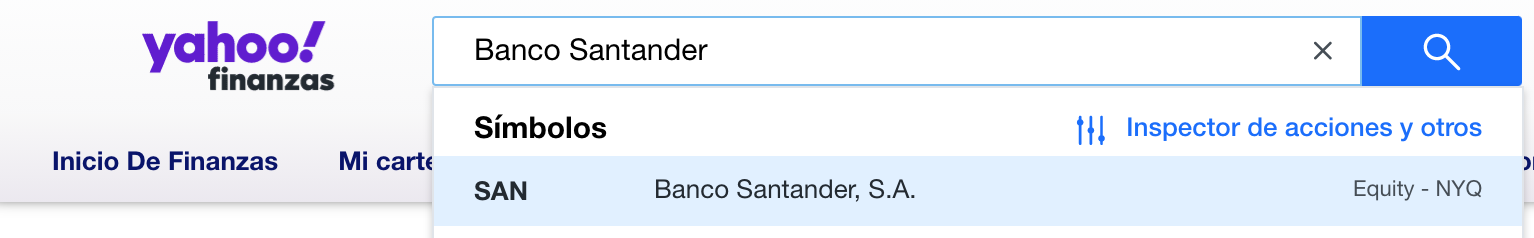
" class="center"/></a>
Figura 1: Obtención de símbolo en Yahoo Finanzas.

En este caso se ha buscado el "Banco Santander", y su símbolo es "SAN". Por tanto, para la obtencion de los datos basta con usar,

In [3]:
SAN = data.DataReader('SAN', 'yahoo', start, end)

# Se traducen las columnas al castellano
cols = {'High':'Max', 'Low':'Min', 'Open':'Apertura',
           'Close':'Cierre', 'Volume':'Volumen', 'Adj Close':'Cierre Ajustado'}
SAN = SAN.rename(columns=cols)

#print(SAN.head().to_markdown())

| Date                |   Max |   Min |   Apertura |   Cierre |   Volumen |   Cierre Ajustado |
|:--------------------|------:|------:|-----------:|---------:|----------:|------------------:|
| 2006-01-03 00:00:00 | 13.62 | 13.35 |      13.38 |    13.57 |    702300 |           5.07906 |
| 2006-01-04 00:00:00 | 13.75 | 13.61 |      13.63 |    13.75 |    377400 |           5.14643 |
| 2006-01-05 00:00:00 | 13.72 | 13.65 |      13.71 |    13.67 |    346100 |           5.11649 |
| 2006-01-06 00:00:00 | 13.89 | 13.72 |      13.72 |    13.87 |    216000 |           5.19135 |
| 2006-01-09 00:00:00 | 13.71 | 13.55 |      13.68 |    13.71 |    337100 |           5.13146 |

Con ello se obtienen datos para:
* **Max:** El valor máximo alcanzado durante el día.
* **Min:** El valor mínimo alcanzado durante el día.
* **Apertura:** El valor con el que se comienza el día.
* **Cierre:** El valor con el que se termina el día.
* **Volumen:** El número de movimientos realizados durante el día.
* **Cierre Ajustado:** El valor de cierre al terminar el día tras ser ajustado debido a acciones corporativas. Este valor no será usado.

Se escogen por tanto una serie de bancos en función de su Marca de Comercio (MC),
* Banco Santander, (SAN.MC)
* CaixaBank, S.A. (CABK.MC)
* Banco Bilbao Vizcaya Argentaria, S.A. (BBVA.MC)
* Bankinter, S.A. (BKT.MC)
* Banco de Sabadell, S.A. (SAB.MC)
* Unicaja Banco, S.A. (UNI.MC)

Esto se configura en un único data frame,

In [4]:
BBVA = data.DataReader('BBVA.MC', 'yahoo', start, end).drop('Adj Close',axis=1)
BKT = data.DataReader('BKT.MC', 'yahoo', start, end).drop('Adj Close',axis=1)
CABK = data.DataReader('CABK.MC', 'yahoo', start, end).drop('Adj Close',axis=1)
SAB = data.DataReader('SAB.MC', 'yahoo', start, end).drop('Adj Close',axis=1)
SAN = data.DataReader('SAN.MC', 'yahoo', start, end).drop('Adj Close',axis=1)

simbolos = ['BBVA', 'BKT','CABK', 'SAB','SAN']
val_banc = pd.concat([BBVA, BKT, CABK, SAB, SAN],axis=1, keys=simbolos).rename(columns=cols)
val_banc.columns.names = ['Simbolo Corp.', 'Info. Valor']
val_banc.index.names = ['Fecha']

Se muestra la cabecera del data frame,

In [5]:
val_banc.head(3)

Simbolo Corp.       BBVA                                                \
Info. Valor          Max        Min   Apertura     Cierre      Volumen   
Fecha                                                                    
2006-01-03     14.689775  14.516841  14.564879  14.622523  114410814.0   
2006-01-04     14.824279  14.641738  14.622523  14.805065  154165488.0   
2006-01-05     14.881924  14.737812  14.805065  14.872317  124261497.0   

Simbolo Corp.       BKT                                           ...  \
Info. Valor         Max       Min  Apertura    Cierre    Volumen  ...   
Fecha                                                             ...   
2006-01-03     5.999661  5.957024  5.984612  5.969562  1502562.0  ...   
2006-01-04     6.013459  5.919401  6.013459  5.988374   631475.0  ...   
2006-01-05     5.994648  5.975836  5.988374  5.980849  3201959.0  ...   

Simbolo Corp.       SAB                                                SAN  \
Info. Valor         Max       Min  Apertura    Cierre    Volumen       Max   
Fecha                                                                        
2006-01-03     3.319330  3.289693  3.304512  3.304512  4679487.0  9.754196   
2006-01-04     3.319330  3.289693  3.304512  3.319330  4804905.0  9.788816   
2006-01-05     3.334149  3.289693  3.319330  3.289693  5761638.0  9.806126   

Simbolo Corp.                                            
Info. Valor         Min  Apertura    Cierre     Volumen  
Fecha                                                    
2006-01-03     9.641681  9.684956  9.702266  35443227.0  
2006-01-04     9.719576  9.745541  9.771506  72378377.0  
2006-01-05     9.728231  9.771506  9.788816  21246144.0  

[3 rows x 25 columns]

Mediante una gráfica interactiva, donde se puede seleccionar y deseleccionar los bancos mostrados usando la leyenda, se puede observar la evolución temporal del valor de cierre. Además si se requiere, se puede seleccionar el icono de doble etiqueta bajo el nombre "Compare data on hover" para realizar una comparativa entre todos los bancos seleccionados.

In [6]:
val_banc.xs(key='Cierre',axis=1,level='Info. Valor').iplot()

Se aprecian bastantes caídas, subidas y diferentes tendencias, pero de primeras no es posible obtener información significativa de esta base de datos. Por tanto, es necesario proceder a un análisis exploratorio de datos.

<a name='aed'></a>
## Análisis Exploratorio de Datos

Dada la naturaleza de la base de datos; en este apartado se emplean herramientas de multi-índices y de datos transversales. Para ello se hace uso de la [función .xs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html). Por ejemplo, se busca el valor máximo de cierre obtenido por cada empresa desde el día de su inauguración,

In [7]:
val_banc.xs(key='Cierre',axis=1,level='Info. Valor').max().sort_values(ascending=False)

Simbolo Corp.
BBVA    19.291739
SAN     12.982515
BKT     12.603816
SAB      5.527278
CABK     5.350000
dtype: float64

Se estudia también el rendimiento de cada banco. Para un día $t$ el rendimiento $r_t$ viene dado por,
\begin{equation}\label{eq:rend}
r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1,
\end{equation}
siendo $p_t$ el valor de cierre del día $t$ y $p_{t-1}$ el valor de cierre del día anterior. Dicho rendimiento puede ser calculado aplicando ``pct_change()`` de ``pandas`` a la columna de ``Cierre`` para cada banco. Posteriormente, se multiplica por 100 para tener el valor de rendimiento en tanto por ciento.

In [8]:
rendimiento = pd.DataFrame()
for simb in simbolos:
    rendimiento[simb+' Rendimiento'] = val_banc[simb]['Cierre'].pct_change().mul(100)
# print(rendimiento.head(3).to_markdown)

**Nota**: La primera fila no debe tener valores, pues la fórmula de rendimiento está definida según el día anterior, y ésta no tiene.

| Fecha               |   BBVA Rendimiento |   BKT Rendimiento |   CABK Rendimiento |   SAB Rendimiento |   SAN Rendimiento |
|:--------------------|-------------------:|------------------:|-------------------:|------------------:|------------------:|
| 2006-01-03  |      nan           |      nan          |                nan |      nan          |      nan          |
| 2006-01-04  |        0.0124836   |        0.00315135 |                nan |        0.00448416 |        0.00713654 |
| 2006-01-05  |        0.00454251  |       -0.00125668 |                nan |       -0.00892857 |        0.00177149 |


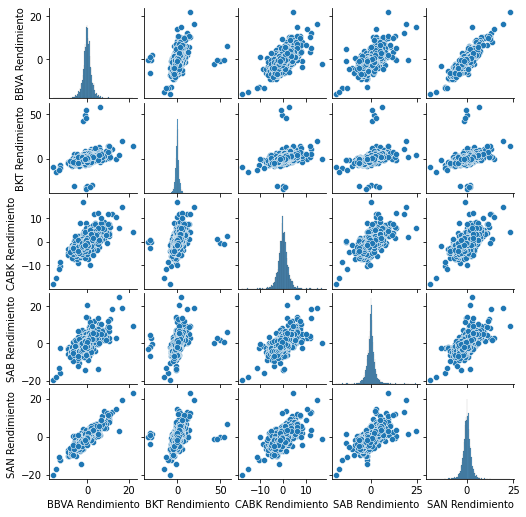

In [9]:
sns.pairplot(rendimiento[1:]).fig.set_size_inches(7,7)

 <img scr='test.png' class = 'center'>


A simple vista, destaca aquí la diferencia entre las pendientes relacionadas con Bankinter en comparación con las de su competencia. Éstas muestran que el rendimiento de Bankinter es en general menor que el de las otras entidades bancarias. Esto quiere decir que los otros bancos han sabido aprovechar mejor sus recursos para ir aumentando más su valor.
Además se puede observar que el caso de mayor similitud se encuentra entre el BBVA y el banco Santander pues las gráficas muestran una tendencia lineal de igual proporción.

A partir del rendimiento se pueden obtener cuándo se produjo la mayor caída por banco,

In [10]:
rendimiento.idxmin()

BBVA Rendimiento   2016-06-24
BKT Rendimiento    2007-12-19
CABK Rendimiento   2016-06-24
SAB Rendimiento    2016-06-24
SAN Rendimiento    2016-06-24
dtype: datetime64[ns]

Se observa que la mayoría de los bancos sufrieron su mayor caída el 24 de junio de 2016. En este día se oficializó el Brexit, [hundiendo a más de un 12% al Ibex en la peor sesión de su historia](https://www.elmundo.es/economia/2016/06/24/576ca8c5468aebfb798b4570.html). De igual manera, se puede estudiar cuándo se produjo la mayor subida por banco,

In [11]:
rendimiento.idxmax()

BBVA Rendimiento   2010-05-10
BKT Rendimiento    2011-08-12
CABK Rendimiento   2011-01-28
SAB Rendimiento    2020-11-16
SAN Rendimiento    2010-05-10
dtype: datetime64[ns]

Existe más discrepancia entre estos valores que con los anteriores, esto muestra la característica caótica del sistema que se está tratando. Pero de nuevo, se vuelve a observar similitud entre el BBVA y Banco Santander pues ambos obtuvieron su máximo de rendimiento el 10 de mayo de 2010. En esta semana la Unión Europea acordó junto con el Fondo Monetario Internacional iniciaron un [mecanismo de rescate para asegurar la estabilidad del euro,](https://elpais.com/economia/2010/05/10/actualidad/1273476773_850215.html) del cual [Santander, BBVA y Telefónica](https://www.eleconomista.es/mercados-cotizaciones/noticias/2129167/05/10/Locura-en-la-apertura-casi-nadie-sale-de-subasta-por-la-presion-compradora.html) fueron los que más se aprovecharon.

Para comprobar las similitudes entre bancos se usa un diagrama de calor clusterizado pues da la correlación entre los valores de cierre para los distintos bancos.

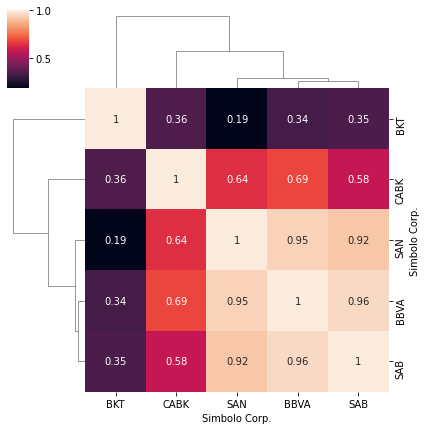

In [12]:
sns.clustermap(val_banc.xs(key='Cierre',axis=1,level='Info. Valor').corr(),annot=True, figsize=(6,6),)

Se identifica por tanto que el Banco Sabadell, el Banco Santander y el BBVA forman un grupo con una correlación mayor del 0.9. Bankinter y Caixabank permanecen aislados, siendo Caixabank el más correlacionado al grupo anterior. Dichas asociaciones pueden ser debidas a similitudes en la gestión de fondos o decisiones corporativas. Éstas no servirán como indicadores a la hora de realizar predicciones.

Por otro lado, se estudia el riesgo durante todo el periodo de tiempo. Una manera simple de realizar esto es calculando la desviación típica del rendimiento. A mayor variación en el rendimiento mas arriesgado es invertir pues mayor probabilidad hay de acabar teniendo un valor menor al de la media.

In [13]:
rendimiento.std()

BBVA Rendimiento    2.261645
BKT Rendimiento     3.174759
CABK Rendimiento    2.175864
SAB Rendimiento     2.373852
SAN Rendimiento     2.300125
dtype: float64

Se observa que el mayor riesgo obtenido es para Bankinter. Si se procede de igual manera para el año 2020,

In [14]:
rendimiento.loc['2020-01-01':'2020-12-31'].std()

BBVA Rendimiento    3.745304
BKT Rendimiento     3.901189
CABK Rendimiento    3.324466
SAB Rendimiento     4.808882
SAN Rendimiento     3.633033
dtype: float64

El riesgo de 2020 ha aumentado en comparación con el dado para el largo periodo de tiempo aquí estudiado. Esta diferencia es probablemente debida al efecto de la pandemia sobre la economía española.

Seguidamente, podemos hacer uso de las herramientas de visualización avanzada dadas por ``plotly`` para mostrar gráficos de estos datos usualmente empleados en finanzas y entender mejor nuestra base de datos.

Un [gráficico de velas](https://es.wikipedia.org/wiki/Gr%C3%A1fico_de_velas) es comunmente usado para representar el valor de apertura, cierre, máximo y mínimo de manera bastante visual. Si la vela es roja quiere decir que el valor de cierre está por encima del de apertura y por tanto el valor ha caído. Para el caso contrario se representa con una vela verde.

Escogiendo para el banco BBVA los datos entre 2006 y 2009 el gráfico de velas resultante es,

In [15]:
bbva_2008 = val_banc['BBVA'][['Apertura','Max','Min','Cierre']].loc['2006-01-01':'2010-01-01']
change= {'Max':'High', 'Min':'Low', 'Apertura':'Open','Cierre':'Close'}

bbva_2008.rename(columns=change).iplot(kind='candle')

Se observa que durante 2008 predomina el color rojo y esto es debido a la [crisis financiera de 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008).\
**Nota** : si se quiere mostrar correctamente los diagramas de vela basta con hacer zoom.



Por último y como ejemplo, se emplea una media móvil (Moving Average) simple para visualizar los datos de manera suavizada y así apreciar las tendencias del tercer trimestre del año 2017 para CaixaBank. La media móvil simple es la media aritmética de los $n$ datos anteriores. Para ello emplearemos la herramienta de análisis técnico ``ta_plot()`` de ``cufflinks``. En este caso se aplica a los datos de cierre y con 12 datos anteriores.


In [16]:
cabk_2017 = val_banc['CABK'][['Cierre']].loc['2017-05-19':'2017-10-01']
cabk_2017.ta_plot(study='sma',periods=12)

La línea naranja marca el valor de cierre y vemos como ésta no es suave mientras que la azul, que corresponde a la media móvil simple (SMA) sí lo es y permite entender la tendencia de la serie temporal.

<a name='met'></a>
## Método
El objetivo de este estudio se centra ahora en realizar predicciones sobre el portfolio del Banco Santander, se emplean datos pasados de este banco además de los expuestos en el apartado anterior para intentar obtener provecho de las correlaciones existentes.

Para poder elegir entre que algoritmos usar es necesario entender correctamente el fin último de cada uno de ellos. En este trabajo se abordan dos enfoques,
1. Conocer a medio plazo el comportamiento de la tendencia del precio y saber si es seguro invertir en un portfolio o serie temporal.
2. Conocer una buena predicción inmediata para el día siguiente en el precio de cierre.

Cabe destecar, que para estas problemáticas diferentes se ha tratado de buscar modelos lo suficientemente simples para abaratar el tiempo de computación, pero a su vez siendo lo suficientemente robustos como para arrojar conclusiones acertadas.

Para conocer a medio plazo el comportamiento de la tendencia del precio, conviene aplicar un modelo regresional obtenido con *SARIMAX*, el modelo recibe este nombre por el acrónimo del ingles **s**easonal **a**uto **r**egressive **i**ntegrated **m**oving **a**verage with e**x**ogenous factors. Este modelo se basa en una fórmula matemática en la que se tiene en cuenta,
* La estacionalidad (seasonal) de la serie temporal.
* Valores pasados, pues estos son los mejores predictores (auto regressive).
* Diferencias entre los valores (integrated).
* Errores pasados cometidos por el modelo a la hora de ajustar valores conocidos (moving average).
* Indicadores externos (exogenous factors).

No es necesario incluir todas las variables y la combinación puede cambiar según a lo que se le de más importancia, por tanto en el archivo [modelo SARIMAX](https://github.com/Marioherreroglez/TFM_Herrero/blob/main/Prediccion_SARIMAX.html)  se ha hecho el tratado de datos y calibrado del modelo.

Para saber si es seguro invertir en un portfolio, interesa estudiar la volatilidad, una alta volatilidad equivale a un mercado inestable donde las pérdidas pueden ser mayores. Para su análisis es necesario tratar con el rendimiento y es probado con un modelo llamado *GARCH*. *GARCH* proviene de las siglas del inglés **g**eneralized **a**uto **r**egressive **c**onditional **h**eteroskedasticity model. Aquí se tiene en cuenta que,
* Generalizado hace referencia a que se tiene encuenta a errores pasados y varianza pasada.
* El error pasado cometido (auto regression).
* La heterocedasticidad se refiere a diferente varianza, es decir a periodos anteriores y por tanto condicional a que depende de ellas.

En ambos casos se emplean datos de cinco años, de 2010 a 2015, para crear el modelo y se obtienen predicciones para el año 2016 del Banco Santander.

Para obtener una predicción a corto plazo, se emplea una *Red Neuronal Recurrente* basada en capas *LSTM*. *LSTM* hace referencia a Long-Short Term Memory y lo único necesario a saber de ellas es que evitan problemas matemáticos a la hora de considerar series temporales. El tratado de este apartado se encuentra en el anexo [modelo RNN](https://github.com/Marioherreroglez/TFM_Herrero/blob/main/Prediccion_RNN.html).

En este caso se vuelven a emplear datos de cinco años, de 2010 a 2015 pero se obtienen resultados diarios para los sesenta primero días de 2016.


<a name='res'></a>
## Resultados


Los resultados que se muestran son obtenidos tras pruebas de los modelos anteriormente expuestos, además de otros para comprobar cuál rinden mejor. Durante el proceso se han ajustado diversos parámetros para así optimizar cada uno de ellos.

<a name='estudio_1'></a>
### Estudio de la tendencia a medio plazo

Para estudiar el valor de cierre a medio plazo se han probado varias combinaciones para obtener un modelo matemático. Las diferentes combinaciones se muestran en la gráfica interactiva de este apartado. Se han aplicado los diversos modelos presentes para el análisis de series temporales.

In [17]:
pred_1 = pd.read_csv('prediccion1.csv').rename(columns={'Unnamed: 0':'fecha'}).set_index('fecha')
pred_1.iplot()

Los modelos AR, MA y SARMA no son aplicables a este tipo de datos pues rápidamente alcanzan un estado estacionario y  no captan los patrones de estos. Los únicos útiles son el ARMAX y SARIMAX. Estos dos funcionan correctamente pues se han empleado como variables exógena el resto de bancos. Es gracias a la correlación entre ellos, vista en el apartado del análisis exploratorio de datos que se predice con cierta precisión la evolución temporal.

La diferencia entre ARMAX y SARIMAX es que los parámetros de SARIMAX han sido calculados por el ordenador comparando de manera automática, mientras que para el modelo ARMAX se han obtenido los parámetros bajo el test de Dickey Fuller de manera manual. En este caso no existe diferencia entre los dos pues las aportaciones dadas por SARIMAX al modelo matemático no son significativas.

La ventaja del modelo matemático dado por SARIMAX es que el tiempo empleado para conseguirlo ha sido mucho menor que el empleado manualmente para el ARMAX. No obstante,  si estuviésemos trabajando con una base de datos mucho más grande y más series temporales, el esfuerzo empleado para encontrar un modelo más simple sería recompensado en ahorro de tiempo de computación.

Una pega para esta predicción es que la tendencia no es del todo exacta. Los valores son muy próximos, pero si se hace zoom se observa que para el 31 de octubre de 2016 en lugar de una bajada en rendimiento, se predice una subida. Esto puede resultar en pérdidas.

Es por ello que para obtener una idea del desarrollo de la serie temporal a lo largo del año es conveniente realizar este tipo de análisis. No obstante es necesario desarrollar una herramienta que pueda seguir correctamente la tendencia.

<a name='estudio_2'></a>
### Estudio de la volatilidad


En este caso se trata de encontrar cuando se tiene un alto nivel de volatilidad, para no invertir más de la cuenta pues una alta volatilidad conlleva una alta inestabilidad. De igual manera a la hora de invertir se busca cuando se van a tener periodos de estabilidad y sacar provechos de ellos.

In [18]:
pred_2 = pd.read_csv('prediccion2.csv').set_index('Fecha').rename(columns={'h.1':'GARCH','rend_san':'real'})
pred_2.iplot()

La volatilidad predicha es en general más exagerada que la que realmente existe. No obstante, de este tipo de modelo no es posible tomar variaciones más complejas pues se demuestra matemáticamente que añadir más parámetros no es significativo. La buena noticia es que esta exageración puede jugar a favor del inversor, pues a sabiendas de que el modelo siempre predice un portfolio más inestable, esto da al inversor cierto margen de maniobra. Cabe destacar que la tendencia se predice bien y los picos son modelizados.

El modelo es más eficaz cuando no periodos de estabilidad,de septiembre en adelante, y entre mayo y mediados de junio. Esto se debe a que la volatilidad está clusterizada. Es decir, lo normal es esperar que para subidas en la volatilidad cabe esperar que ésta siga subiendo y de igual manera para cuando ésta baje o se quede estable. Por ello, cuando el modelo observa una subida, la subida se mantiene más de lo que realmente ocurre.

<a name='estudio_3'></a>
### Estudio a corto plazo

El movimiento Browniano existe en la evolución temporal del valor de mercado financiero. Afirma que las variaciones futuras del precio son independientes del pasado, por lo cual es imposible predecir con total exactitud el valor de mercado. De no ser así, todos podríamos ser bilionarios. No obstante si es posible predecir la tendencia, es decir si el precio va a subir o bajar y para ello se emplea una red neuronal recurrente basado en celdas LSTM las cuales son más potentes que el modelo ARIMA. En la gráfica de este apartado se estudia como evoluciona el modelo para cada día en función de los sesenta días anteriores, por tanto esta red neuronal entreneda sirve para lanzar predicciones diarias.


In [19]:
pred_3 = pd.read_csv('prediccion3.csv').set_index('Fecha')
pred_3.iplot()

Se observa que la tendencia diaria es correcta para cambios suaves, no obstante la red neuronal no es capaz de reaccionar con total exactitud a rapidos cambios lineares. Esto de nuevo es normal por el principio del movimiento Browniano donde el precio no tiene memoria de lo que le sucedió anteriormente.

Cuando se comparan modelos regresionales se utiliza la métrica RMSE (Root Mean Squared Error) del inglés error cuadrático medio. No obstante, esto solo sirve para medir como de cerca se está del valor real pero no de como realmente varía. Es decir, puede que se esté muy cerca del valor pero si se ha predicho que se da una subida y en su lugar resulta en una bajada se habrán tenido pérdidas pues se habrá invertido cuando no se debía. De igual manera, se puede llegar a perder una oportunidad de inversión y por tanto ganancias si se predice una bajada cuando en su lugar se da una subida.

Este modelo se puede complicar si al igual que antes se utilizan indicadores como el precio de cierre de otros bancos. Pero, el tiempo de computación para entrenar la red aumentaría exponencialmente en función de la cantidad de indicadores externos que se incluyan.

<a name='concl'></a>
## Conclusiones

En común, todos los modelos no predicen con total exactitud el valor y tendencia de la serie temporal. Esto es debido a la naturaleza del sistema, pues como se ha expuesto, la variación del precio de cierre no recuerda sus anteriores variaciones. Es decir, no hay ninguna dependencia.

No obstante, se puede dividir el problema en diferentes enfoques. Como primera solución se trata de obtener el valor de mercado de Banco Santander en función de valores pasados tanto del propio Banco Santander como de BBVA, Banco Sabadell, Caixabank y Bankinter que constan como indicadores. Los resultados arrojados por el modelo SARIMAX ayudan a tener una idea de donde se encontrarán los valores de mercado durante todo el año pero predice con exactitud ciertas bajadas o subidas.

Para la segunda problemática se trata de asegurar que el mercado es estable durante la mayoría del periodo estudiado, y que cuando este no lo sea, poder predecirlo. El model GARCH empleado es, matemáticamente, el más acertado para ello. Este modelo da valores mayores a los reales y exagera más los picos, por tanto es conveniente hacer caso a los resultados pero siempre con la idea de que hay cierto margen para poder arriesgarse más.

Por último, se emplea la inteligencia artificial para obtener con la mayor exactitud posible la tendencia de la línea temporal. El modelo empleado es una red neuronal recurrente y esta resulta satisfactoria a la hora de calcular cuando se darán las subidas y bajadas diariamente.

<a name='disc'></a>
## Discusión
Por un lado, la calidad de los datos ha permitido obtener datos satisfactorios. Pues sabido es que si se le da basura a un modelo este devolverá basura. El hecho de que sean de acceso fácil y libre permiten que haya toda una comunidad que elabore sobre ellos y permite obtener mejores resultados.

Por otro lado, los modelos aquí expuestos pueden ser sustituidos por otros más avanzados para obtener mejores resultados. Tanto en el dominio de inteligencia artificial o asimilación de datos. No obstante, estos modelos pueden realizarse con un ordenador a nivel de usuario y permiten iniciar al usuario al mundo de las finanzas. Pero no sirven igual de bien que los modelos dados por todo un equipo investigador y experto sobre el tema.

Es por ello que es de vital importancia estar al día en nuevas tecnologías y nuevos métodos. Una de las técnologías que promete a la hora de predecir resultados bajo este tipo de sistemas caóticos es el Quantum Machine Learning, que aún está bajo desarrollo. Con esto se quiere decir, que no se debe nunca permanecer inmóvil con un modelo que funcione bien ahora, sino mantenerse a la orden del día para poder estar a la altura de la competencia.